In [14]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score,silhouette_score
from sklearn.decomposition import PCA

In [8]:
with open('k_values_metrics.txt', 'r') as f:
    metrics = f.read()

In [9]:
metrics = metrics.split('\n')

In [50]:
k_values_list = []
sum_of_squared_distances_list = []
for i in metrics:
    extraction_regex = re.match(r'(?P<k_value>\d+)\,(?P<metric>.*)',i)
    if extraction_regex:
        k_value = extraction_regex.group('k_value') 
        sum_of_squared_distances = extraction_regex.group('metric')
        k_values_list.append(int(k_value))
        sum_of_squared_distances_list.append(float(sum_of_squared_distances))
delta1 = [x-y for x, y in zip(sum_of_squared_distances_list, sum_of_squared_distances_list[1:])]
delta2 = [x-y for x, y in zip(delta1, delta1[1:])]
delta1_range = (len(sum_of_squared_distances_list) - len(delta1))
delta2_range = len(sum_of_squared_distances_list) - len(delta2)
for i in range(delta1_range):
    delta1.insert(0,0.0)
for i in range(delta2_range):
    delta2.insert(0,0.0)

In [53]:
data_tuples = list(zip(k_values_list,
                       sum_of_squared_distances_list,
                       delta1,
                       delta2))

k_df = pd.DataFrame(data_tuples, columns=['k_value', 'sum_of_squared_distances', 'delta1', 'delta2'])

In [55]:
k_df.tail(2)

k_value  sum_of_squared_distances      delta1      delta2
147      148              35068.836888  -87.662936  154.569502
148      149              34952.812230  116.024659 -203.687595

In [56]:
k_df['is_elbow'] = np.where(k_df['delta2'] > k_df['delta1'],True,False)
k_df['strength'] = np.where(k_df['is_elbow'],k_df['delta2'] - k_df['delta1'],np.nan)
k_df['relative_strength'] = np.where(k_df['strength'],k_df['strength']/k_df.index.values,np.nan)

In [58]:
k_df.sample(5)

k_value  sum_of_squared_distances     delta1      delta2  is_elbow  \
130      131              35314.206730  59.203076  -63.361448     False   
97        98              35884.336883  54.989608   74.443330      True   
127      128              35303.503744  63.528192    4.058763     False   
128      129              35369.251434 -65.747690  129.275881      True   
58        59              37082.263421  40.215338  -29.004128     False   

       strength  relative_strength  
130         NaN                NaN  
97    19.453722           0.200554  
127         NaN                NaN  
128  195.023571           1.523622  
58          NaN                NaN

In [59]:
def plot_elbow(x,y,x_max,y_max,x_rel_max,y_rel_max):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111);
    plt.xlabel('K value')
    plt.ylabel('Sum of squared distances')
    ax.plot(x, y);
    ax.plot(x_max, y_max, color='red',
            marker='o',
            markersize=7);
    ax.plot(x_rel_max, y_rel_max,
            color='green',
            marker='o',
            markersize=7);
    annotation_label_strength = 'K with the highest strength'
    annotation_label_rel_strength = 'K with highest relative strength'
    ax.annotate(annotation_label_strength, 
                xy = (x_max,y_max), 
                xytext=(x_max + 10, y_max + 1000),
                arrowprops=dict(facecolor='black', shrink=0.01));
    ax.annotate(annotation_label_rel_strength, 
                xy = (x_rel_max,y_rel_max), 
                xytext=(x_rel_max + 10, y_rel_max + 1000),
                arrowprops=dict(facecolor='black',
                                shrink=0.01));

[37]


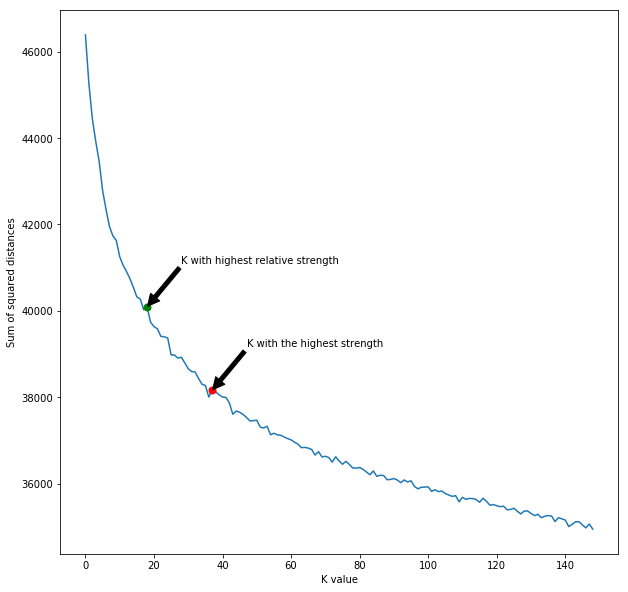

In [61]:
x = k_df.index.values
y = k_df.sum_of_squared_distances
x_max = k_df[k_df['strength']==k_df['strength'].max()].index.values
print(x_max)
y_max = k_df[k_df['strength']==k_df['strength'].max()].sum_of_squared_distances
x_rel_max = k_df[k_df['relative_strength']==k_df['relative_strength'].max()].index.values
y_rel_max = k_df[k_df['relative_strength']==k_df['relative_strength'].max()].sum_of_squared_distances.values
plot_elbow(x,y,x_max,y_max,x_rel_max,y_rel_max)

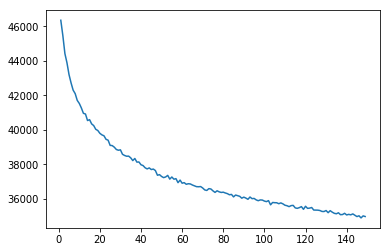

In [10]:
number_of_ks = []
sum_of_squared_distances = []
deltas1 = []
deltas2 = []
for i, metric in enumerate(metrics2, start=1):
    if i != 150:
        number_of_ks.append(i)
        sum_of_squared_distances.append(float(metric))
delta1 = [x-y for x, y in zip(sum_of_squared_distances, sum_of_squared_distances[1:])]
delta2 = [x-y for x, y in zip(delta1, delta1[1:])]
delta1.insert(0,0.0)
delta2.insert(0,0.0)
delta2.insert(0,0.0)
[0] + delta2
sns.lineplot(number_of_ks, sum_of_squared_distances);

In [11]:
k_df = pd.DataFrame(sum_of_squared_distances, columns=['sum_of_squared_distances'], index=number_of_ks)
delta1_df = pd.DataFrame(delta1, columns=['delta1'], index=number_of_ks)
delta2_df = pd.DataFrame(delta2, columns=['delta2'], index=number_of_ks)

In [12]:
k_df.tail(5)

sum_of_squared_distances
145              34987.157801
146              35032.243694
147              34909.378924
148              35026.918892
149              34990.659799

In [13]:
delta1_df.head()
delta2_df.head()

delta2
1    0.000000
2    0.000000
3 -153.181678
4  512.025659
5 -154.603589

In [14]:
k_df = k_df.merge(delta1_df, how='inner', left_index=True, right_index=True)
k_df = k_df.merge(delta2_df, how='inner', left_index=True, right_index=True)
k_df.head(5)

sum_of_squared_distances       delta1      delta2
1              46342.402520     0.000000    0.000000
2              45453.892827   888.509693    0.000000
3              44412.201455  1041.691372 -153.181678
4              43882.535742   529.665712  512.025659
5              43198.266441   684.269301 -154.603589

In [15]:
k_df['is_elbow'] = np.where(k_df['delta2'] > k_df['delta1'],True,False)

In [16]:
k_df['strength'] = np.where(k_df['is_elbow'],k_df['delta2'] - k_df['delta1'],np.nan)

In [17]:
k_df['relative_strength'] = np.where(k_df['strength'],k_df['strength']/k_df.index.values,np.nan)

In [18]:
k_df.sample(5)

sum_of_squared_distances      delta1      delta2  is_elbow    strength  \
122              35477.053218  -16.784579  139.489962      True  156.274541   
119              35407.594893  155.563808 -214.424002     False         NaN   
90               36110.901380  -60.189859  167.957587      True  228.147446   
25               39104.371580  302.001566 -253.578590     False         NaN   
64               36873.864188   12.668121  -44.538042     False         NaN   

     relative_strength  
122           1.280939  
119                NaN  
90            2.534972  
25                 NaN  
64                 NaN

In [19]:
k_df.loc[59]

sum_of_squared_distances    37097.7
delta1                     -149.062
delta2                      380.892
is_elbow                       True
strength                    529.954
relative_strength           8.98227
Name: 59, dtype: object

In [20]:
k_df[k_df['strength']==k_df['strength'].max()].sum_of_squared_distances

59    37097.741421
Name: sum_of_squared_distances, dtype: float64

In [21]:
def plot_elbow(x,y,x_max,y_max,x_rel_max,y_rel_max):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111);
    plt.xlabel('K value')
    plt.ylabel('Sum of squared distances')
    ax.plot(x, y);
    ax.plot(x_max, y_max, color='red',
            marker='o',
            markersize=7);
    ax.plot(x_rel_max, y_rel_max,
            color='green',
            marker='o',
            markersize=7);
    annotation_label_strength = 'K with the highest strength'
    annotation_label_rel_strength = 'K with highest relative strength'
    ax.annotate(annotation_label_strength, 
                xy = (x_max,y_max), 
                xytext=(x_max + 10, y_max + 1000),
                arrowprops=dict(facecolor='black', shrink=0.01));
    ax.annotate(annotation_label_rel_strength, 
                xy = (x_rel_max,y_rel_max), 
                xytext=(x_rel_max + 10, y_rel_max + 1000),
                arrowprops=dict(facecolor='black',
                                shrink=0.01));

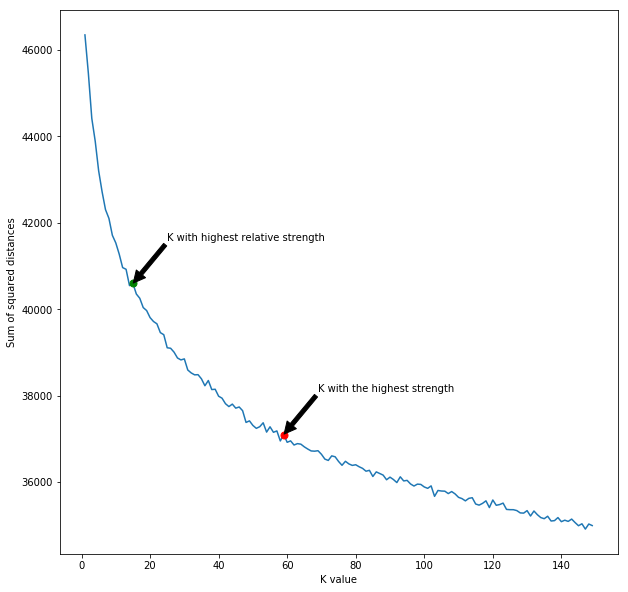

In [22]:
x = k_df.index.values
y = k_df.sum_of_squared_distances
x_max = k_df[k_df['strength']==k_df['strength'].max()].index.values
y_max = k_df[k_df['strength']==k_df['strength'].max()].sum_of_squared_distances
x_rel_max = k_df[k_df['relative_strength']==k_df['relative_strength'].max()].index.values
y_rel_max = k_df[k_df['relative_strength']==k_df['relative_strength'].max()].sum_of_squared_distances.values
plot_elbow(x,y,x_max,y_max,x_rel_max,y_rel_max)